In [16]:
%matplotlib inline

import pandas as pd
from datetime import datetime
from time import time
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt


In [17]:
import CompCycle_Utils as utils

In [18]:
reload(utils)


<module 'CompCycle_Utils' from 'CompCycle_Utils.pyc'>

In [19]:
utils.one_minute

numpy.timedelta64(1,'m')

In [20]:
import os
HomeDir='/Users/Jason/Desktop/temperature-analysis-utilities'
DataDir=os.path.join(HomeDir,'Data')
DataFile='CumbieTemperatureData.csv'
FullDataFile='%s/%s'%(DataDir,DataFile)

In [21]:
print FullDataFile

/Users/Jason/Desktop/temperature-analysis-utilities/Data/CumbieTemperatureData.csv


In [22]:
print 'loading data from file: ' + DataFile 
CumbieData=pd.read_csv(FullDataFile)
CumbieData.ReadingDate=pd.to_datetime(CumbieData.ReadingDate,format='%Y-%m-%d %H:%M:%S')
CumbieData.info()
# CumbieData.ReadingDate=CumbieData.ReadingDate.apply(XLateToDatetime)

SensorIDs=CumbieData.SensorID.unique()

# print 'Found {} Sensors'.format(len(SensorIDs))


loading data from file: CumbieTemperatureData.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806358 entries, 0 to 806357
Data columns (total 19 columns):
TemperatureID         806358 non-null int64
LogID                 806358 non-null int64
Reading               806358 non-null float64
SensorID              806358 non-null int64
ReadingDate           806358 non-null datetime64[ns]
Alarm                 806358 non-null int64
OriginalReading       806358 non-null float64
age                   806358 non-null int64
IsAged                806358 non-null int64
CreateDate            806358 non-null object
CommandID             806358 non-null int64
SensorName            806358 non-null object
PortID                806358 non-null int64
DeviceID              806358 non-null object
DeviceName            806358 non-null object
GroupID               806358 non-null int64
GroupName             806358 non-null object
SensorPort            806358 non-null object
OriginalReadingInF    806358

In [23]:
CumbieData.info()
CumbieData.ReadingDate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806358 entries, 0 to 806357
Data columns (total 19 columns):
TemperatureID         806358 non-null int64
LogID                 806358 non-null int64
Reading               806358 non-null float64
SensorID              806358 non-null int64
ReadingDate           806358 non-null datetime64[ns]
Alarm                 806358 non-null int64
OriginalReading       806358 non-null float64
age                   806358 non-null int64
IsAged                806358 non-null int64
CreateDate            806358 non-null object
CommandID             806358 non-null int64
SensorName            806358 non-null object
PortID                806358 non-null int64
DeviceID              806358 non-null object
DeviceName            806358 non-null object
GroupID               806358 non-null int64
GroupName             806358 non-null object
SensorPort            806358 non-null object
OriginalReadingInF    806358 non-null float64
dtypes: datetime64[ns](1), float

0        2016-09-26 18:21:22.710
1        2016-09-26 18:26:22.703
2        2016-09-26 18:31:22.710
3        2016-09-27 02:51:47.230
4        2016-09-27 07:07:19.200
5        2016-09-27 11:21:51.207
6        2016-09-27 15:36:48.197
7        2016-09-27 19:51:49.210
8        2016-09-27 21:11:19.707
9        2016-09-28 00:06:49.200
10       2016-09-28 01:26:42.700
11       2016-09-28 04:21:50.207
12       2016-09-28 05:41:22.890
13       2016-09-28 08:36:49.200
14       2016-09-28 09:56:22.703
15       2016-09-28 12:51:50.203
16       2016-09-28 14:11:23.713
17       2016-09-28 17:06:51.887
18       2016-09-28 18:26:22.903
19       2016-09-28 22:41:24.900
20       2016-09-29 02:56:22.907
21       2016-09-29 07:11:22.900
22       2016-09-29 11:26:21.700
23       2016-09-29 15:41:24.693
24       2016-11-07 16:41:42.523
25       2016-11-07 16:42:51.710
26       2016-11-07 16:42:59.797
27       2016-11-07 16:42:59.797
28       2016-11-07 16:43:53.893
29       2016-11-07 16:44:15.293
          

In [24]:
os.getcwd()
reload(utils)

<module 'CompCycle_Utils' from 'CompCycle_Utils.pyc'>

get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-11-29
Found start_ind: 14 and end_ind: 1779
['2016-11-22T20:56:35.090000000' '2016-11-22T21:02:21.957000000'
 '2016-11-22T21:07:21.927000000' ..., '2016-11-28T23:40:17.510000000'
 '2016-11-28T23:45:16.543000000' '2016-11-28T23:50:16.947000000']
times[1:] - times[:-1]:
[346867000000 299970000000 299366000000 ..., 299800000000 299033000000
 300404000000]
intervals:
[ 5.78111667  4.9995      4.98943333 ...,  4.99666667  4.98388333
  5.00673333]
plot_temps() call with times vector:


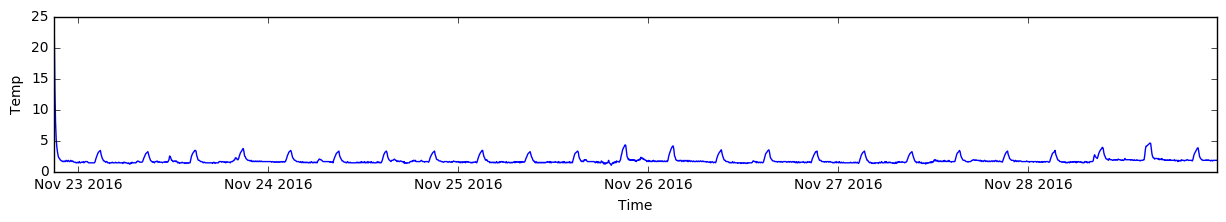

In [25]:
sensor = SensorIDs[0]
sensor_data = utils.get_sensor_tempdata(CumbieData, sensor,SortField='ReadingDate')
start_time = '2016-11-20'
end_time = '2016-11-29'
# sensor_data.info()
start_ind, end_ind = utils.find_start_stop(sensor_data, start_time, end_time)
print 'Found start_ind: {} and end_ind: {}'.format(start_ind,end_ind)
temps, times = utils.temps_times(sensor_data, start_ind, end_ind)
print times
utils.plot_intervals(times)
utils.plot_temps(temps, times)



In [26]:
ii = 0
sensor_info = {}
unit_sensors = []
for sensor in SensorIDs :
    make = 'Unknown'
    model = 'Unknown'
    loc_type = 'Unknown'
    sensor_info[sensor] = {'SensorID' : sensor, 'Make' : make, 'Model' : model, 'LocType' : loc_type}
    unit_sensors.append(sensor)
    print 'done processing sensorid {}'.format(sensor)
    print str(sensor_info)


done processing sensorid 185847
{185847: {'SensorID': 185847, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}}
done processing sensorid 186068
{186068: {'SensorID': 186068, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 185847: {'SensorID': 185847, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}}
done processing sensorid 174898
{174898: {'SensorID': 174898, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 186068: {'SensorID': 186068, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 185847: {'SensorID': 185847, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}}
done processing sensorid 174797
{174898: {'SensorID': 174898, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 186068: {'SensorID': 186068, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 174797: {'SensorID': 174797, 'Make': 'Unknown', 'Model': 'Unknown', 'LocType': 'Unknown'}, 185847: {'SensorID': 185847, 'Make': 'Unknown', '

In [27]:
tic = time()
start_time = '2016-11-20'
end_time = '2016-12-09'
sensor_info = {}
for sensor in SensorIDs :
    sensor_info[sensor] = {'SensorID' : sensor, 'Make' : 'Unknown', 'Model' : 'Unknown', 'LocType' : 'Unknown'}

for sensor in SensorIDs :
    sensor_data = utils.get_sensor_tempdata(CumbieData, sensor,SortField='ReadingDate')
#     print 'sensor_data.head():'
#     print sensor_data.head()
    start_ind, end_ind = utils.find_start_stop(sensor_data, start_time, end_time)
    print 'found start index: {},  end index: {}'.format(start_ind, end_ind)
    temps, times = utils.temps_times(sensor_data, start_ind, end_ind)
    inds_5_to_15 = np.arange(0, len(temps) - 1, 3)
    print 'For sensor {}, processing {} times'.format(sensor,len(times))
#     print 'sensor_info[{}]:'.format(sensor)
#     print sensor_info[sensor]
    print 'times, with length: {}'.format(len(times))
    if len(times) > 95 :
        standard_interval = mode([round(interval) for interval in (times[1:] - times[:-1]) / utils.one_minute])[0][0]
        if standard_interval == 5. :
            temps5 = temps
            times5 = times
            temps = temps[inds_5_to_15]
            times = times[inds_5_to_15]
        if standard_interval == 0. : print sensor, standard_interval, len(times), times[:10], temps[:10]
        print 'standard_interval calculated as: {}'.format(standard_interval)
        sensor_info[sensor]['Interval'] = standard_interval
        n_r = int(24 * 60 / 15)
        min_ratio = 100.
        min_ratio_n_r = n_r
#         print 'times, with length: {}'.format(len(times))
#         print times
        print 'generating window using times[-1]: {} and times[0]: {}'.format(times[-1],times[0])
        window = round((times[-1] - times[0]) / utils.one_minute)

        comp_cyc_win, weights_win, frac_win = utils.find_comp_cyc_win(temps, times, n_r, standard_interval)
        sensor_info[sensor]['CompCycWin'] = np.mean(comp_cyc_win)
        sensor_info[sensor]['CompCycVarWin'] = np.std(comp_cyc_win)
        sensor_info[sensor]['FractionWin'] = frac_win        
        
        whole_comp_cyc = utils.whole_compressor_cycle(temps, 15)
#         print whole_comp_cyc
        if whole_comp_cyc > 0 and whole_comp_cyc / window < 0.49 :
            sensor_info[sensor]['CompCyc'] = whole_comp_cyc
            sensor_info[sensor]['CompCycVar'] = whole_comp_cyc * 0.01
            sensor_info[sensor]['Fraction'] = 1.
            sensor_info[sensor]['Window'] = round((times[-1] - times[0]) / utils.one_minute)

        else :
            while n_r > 90 / 15 and min_ratio > 0.01:
                mean_comp_cyc, std_comp_cyc, frac_comp_cyc, min_ratio, min_ratio_n_r, window = utils.calculate_compressor_cycles(temps, n_r, min_ratio, min_ratio_n_r, 15.)
                n_r /= 2
            mean_comp_cyc, std_comp_cyc, frac_comp_cyc, min_ratio, min_ratio_n_r, window = utils.calculate_compressor_cycles(temps, min_ratio_n_r, min_ratio, min_ratio_n_r, 15.)
            sensor_info[sensor]['CompCyc'] = mean_comp_cyc
            sensor_info[sensor]['CompCycVar'] = std_comp_cyc
            sensor_info[sensor]['Fraction'] = frac_comp_cyc
            sensor_info[sensor]['Window'] = window

            
        if standard_interval == 5 :
            n_r = int(24 * 60 / standard_interval)
            min_ratio = 100.
            min_ratio_n_r = n_r
            window = round((times[-1] - times[0]) / utils.one_minute)

            comp_cyc_win5, weights_win5, frac_win5 = utils.find_comp_cyc_win(temps5, times5, n_r, standard_interval)
            sensor_info[sensor]['CompCycWin5'] = np.mean(comp_cyc_win5)
            sensor_info[sensor]['CompCycVarWin5'] = np.std(comp_cyc_win5)
            sensor_info[sensor]['FractionWin5'] = frac_win5

            whole_comp_cyc5 = utils.whole_compressor_cycle(temps5, standard_interval)
            if whole_comp_cyc5 > 0 and whole_comp_cyc / window < 0.49 :
                sensor_info[sensor]['CompCyc5'] = whole_comp_cyc5
                sensor_info[sensor]['CompCycVar5'] = whole_comp_cyc5 * 0.01
                sensor_info[sensor]['Fraction5'] = 1.
                sensor_info[sensor]['Window5'] = round((times5[-1] - times5[0]) / utils.one_minute)
            else :
                while n_r > 90 / standard_interval and min_ratio > 0.01:
                    mean_comp_cyc, std_comp_cyc, frac_comp_cyc, min_ratio, min_ratio_n_r, window = utils.calculate_compressor_cycles(temps5, n_r, min_ratio, min_ratio_n_r, standard_interval)
                    n_r /= 2
                mean_comp_cyc, std_comp_cyc, frac_comp_cyc, min_ratio, min_ratio_n_r, window = utils.calculate_compressor_cycles(temps5, min_ratio_n_r, min_ratio, min_ratio_n_r, standard_interval)
                sensor_info[sensor]['CompCyc5'] = mean_comp_cyc
                sensor_info[sensor]['CompCycVar5'] = std_comp_cyc
                sensor_info[sensor]['Fraction5'] = frac_comp_cyc
                sensor_info[sensor]['Window'] = window


    else :
        print 'times vector is too short!  setting to error values'
        sensor_info[sensor]['CompCyc'] = -2
        sensor_info[sensor]['CompCycVar'] = -2
        sensor_info[sensor]['Interval'] = -2
        sensor_info[sensor]['Fraction'] = -2
#     print sensor, sensor_info[sensor]['CompCyc'], sensor_info[sensor]['CompCycVar'], sensor_info[sensor]['LocType']
#     print sensor, sensor_info[sensor]


print '%d sensors in in %.2f seconds' % (len(unit_sensors),  time() - tic)

print sensor_info[sensor]

df = pd.DataFrame()
df = df.from_dict(sensor_info, orient = 'index')
# df = df[['SensorID', 'DeviceID', 'Make', 'Model', 'LocType', 'Interval', 'CompCyc', 'CompCycVar', 'Fraction', 'Window', 'CompCycWin', 'CompCycVarWin', 'FractionWin', 'CompCyc5', 'CompCycVar5', 'Fraction5', 'CompCycWin5', 'CompCycVarWin5', 'FractionWin5']]
df.info()

get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 14,  end index: 4660
For sensor 185847, processing 4646 times
times, with length: 4646
standard_interval calculated as: 5.0
generating window using times[-1]: 2016-12-08T23:49:23.980000000 and times[0]: 2016-11-22T20:56:35.090000000
get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 10,  end index: 4408
For sensor 186068, processing 4398 times
times, with length: 4398
standard_interval calculated as: 5.0
generating window using times[-1]: 2016-12-08T23:42:09.567000000 and times[0]: 2016-11-23T17:28:09.117000000
get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 3546,  end index: 9019
For sensor 174898, processing 5473 times
times, w

CompCycle_Utils.py:330: RuntimeWarning: divide by zero encountered in divide
  weights = comp_cyc / var


find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 3542,  end index: 9013
For sensor 174797, processing 5471 times
times, with length: 5471
standard_interval calculated as: 5.0
generating window using times[-1]: 2016-12-08T23:49:38.830000000 and times[0]: 2016-11-20T00:02:10.273000000
get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 3543,  end index: 9015
For sensor 174640, processing 5472 times
times, with length: 5472
standard_interval calculated as: 5.0
generating window using times[-1]: 2016-12-08T23:44:32.627000000 and times[0]: 2016-11-20T00:01:54.927000000
get_sensor_tempdata() called with SortField: ReadingDate
find_start_stop() called with start_time: 2016-11-20 and end_time: 2016-12-09
found start index: 3543,  end index: 9015
For sensor 174705, processing 5472 times
times, with length: 5472
standard_interval calculated as: 5.0

In [28]:
df.head()

CompCycVar5  CompCycWin  Fraction5  CompCyc5     Make  Interval  \
88498       31.439     100.729      0.683   160.738  Unknown     5.000   
88500        4.510     114.250      0.152   243.810  Unknown     5.000   
88502        0.000     129.602      0.947   360.000  Unknown     5.000   
88504       14.300     249.356      1.000  1430.000  Unknown     5.000   
90138       63.543     100.184      0.789   700.870  Unknown     5.000   

       CompCycVar  CompCycVarWin  FractionWin  FractionWin5    Window  \
88498      41.797         22.750        1.000         1.000   360.000   
88500      16.102         33.731        0.888         0.691  1440.000   
88502       0.000         31.222        1.000         1.000  1440.000   
88504      14.295        386.678        1.000         1.000 27163.000   
90138       3.721         20.070        1.000         1.000  1440.000   

       CompCycWin5  LocType  Fraction  SensorID    Model  CompCyc  \
88498       55.019  Unknown     0.709     88498  Unknown  136.921   
88500       44.965  Unknown     0.976     88500  Unknown  123.479   
88502      157.227  Unknown     0.947     88502  Unknown  360.000   
88504       72.966  Unknown     1.000     88504  Unknown 1429.500   
90138       47.759  Unknown     0.236     90138  Unknown   36.283   

       CompCycVarWin5   Window5  
88498          11.399       nan  
88500          27.886       nan  
88502          73.880       nan  
88504         103.561 27178.000  
90138           8.332       nan

In [29]:
reload(utils)

<module 'CompCycle_Utils' from 'CompCycle_Utils.pyc'>

In [30]:
TestSensorIDs=[90138]
# TestSensorIDs=[88498]

NumTestSensors=len(TestSensorIDs)
print 'Evaluating {} sensors'.format(NumTestSensors)

RecentDaysToPlot=[.25, .5, 1,2]
# RecentDaysToPlot=[1,2]
NumPlotsPerSensor=len(RecentDaysToPlot)

fig=plt.figure(figsize=(15,4*NumPlotsPerSensor))
for TestSensorIndex in range(NumTestSensors) :
        TestSensorID = TestSensorIDs[TestSensorIndex]
        print 'Processing sensor id {} (index {})'.format(TestSensorID,TestSensorIndex)
        
        TestSensorData=utils.get_sensor_tempdata(CumbieData,TestSensorID,SortField='ReadingDate')
        TestSensorData.info()
        TestTemps=TestSensorData['OriginalReading']
        TestTimes=TestSensorData['ReadingDate']
        TestTimes.head()
#         utils.plot_temps(TestTemps,TestTimes)
        thisCompCycle=int(round(df[df['SensorID']==TestSensorID]['CompCyc5'].values[0]))
        print 'thisCompCycle: {}'.format(thisCompCycle)
        for DaysToPlotIndex in range(NumPlotsPerSensor) :
            thisDaysToPlot=RecentDaysToPlot[DaysToPlotIndex]
            ax=fig.add_subplot(NumPlotsPerSensor,NumTestSensors,(DaysToPlotIndex)*(NumTestSensors)+TestSensorIndex+1)
            print 'this ax: {}'.format(ax)
            utils.plot_sensor_tempdata_recenthistory(TestSensorData,thisDaysToPlot,CompCycleInMinutes=thisCompCycle,ax=ax)


Evaluating 1 sensors
Processing sensor id 90138 (index 0)
get_sensor_tempdata() called with SortField: ReadingDate
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9467 entries, 0 to 9466
Data columns (total 20 columns):
index                 9467 non-null int64
TemperatureID         9467 non-null int64
LogID                 9467 non-null int64
Reading               9467 non-null float64
SensorID              9467 non-null int64
ReadingDate           9467 non-null datetime64[ns]
Alarm                 9467 non-null int64
OriginalReading       9467 non-null float64
age                   9467 non-null int64
IsAged                9467 non-null int64
CreateDate            9467 non-null object
CommandID             9467 non-null int64
SensorName            9467 non-null object
PortID                9467 non-null int64
DeviceID              9467 non-null object
DeviceName            9467 non-null object
GroupID               9467 non-null int64
GroupName             9467 non-null object
Sens

In [58]:
#  Developing a framework in which to apply a comp cycle estimator to a parameterized stepping window
def ApplySteppingWindow_SimpleCompCyc(Data,WindowStepsInMinutes,WindowLengthInMinutes,TimeStampColumn='ReadingDate') :
    print 'ApplySteppingWindow_SimpleCompCyc()::  called with window size {} minutes and step size {} minutes'.format(WindowStepsInMinutes,WindowLengthInMinutes)
    
    #  Expecting data to have a field 'ReadingDate' which will drive the windowing analysis
    if (TimeStampColumn not in Data.columns) :
        print 'Could not find column {} in data - need this column to drive windowing, or set option param TimeStampColumn'.format(TimeStampColumn)
        return -1
    
    #  Determine the complete time range of the data and generate a vector of start times
    TimeStamps = Data[TimeStampColumn]
#     print TimeStamps
    FirstTime = TimeStamps[0]
    LastTime = TimeStamps.iloc[-1]
    print 'ApplySteppingWindow_SimpleCompCyc()::   Start time: {}  End time: {}'.format(FirstTime, LastTime)

In [59]:
ApplySteppingWindow_SimpleCompCyc(CumbieData,60,240)

ApplySteppingWindow_SimpleCompCyc()::  called with window size 60 minutes and step size 240 minutes
ApplySteppingWindow_SimpleCompCyc()::   Start time: 2016-09-26 18:21:22.710000  End time: 2016-12-10 14:16:58.320000
